In [56]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics 

In [57]:
file = r'wine_review.csv'

In [58]:
df = pd.read_csv(file)

In [59]:
df = df.fillna(0) #fill NaN

In [60]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,0,0,Anna Lee C. Iijima,0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,0,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",0,90,32.0,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### 1. Explore Dataset
The aim is to predict the points of a wine based on the other columns

In [61]:
df.shape

(129971, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129971 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129971 non-null  object 
 7   region_1               129971 non-null  object 
 8   region_2               129971 non-null  object 
 9   taster_name            129971 non-null  object 
 10  taster_twitter_handle  129971 non-null  object 
 11  title                  129971 non-null  object 
 12  variety                129971 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [63]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


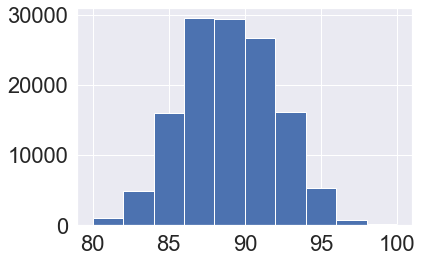

In [64]:
df.points.hist()

In [65]:
df.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [66]:
#Unique Values of columns
print("country:",len(df.country.unique()))
print("description:",len(df.description.unique()), ":lots of varities")
print("designation:", len(df.designation.unique()),":lots of varities")
print("points:",len(df.points.unique()), "NUMERICAL")
print("price:",len(df.price.unique()), "NUMERICAL")
print("province:",len(df.province.unique()))
print("region_1:",len(df.region_1.unique()))
print("region_2:",len(df.region_2.unique()))
print("taster_name:",len(df.taster_name.unique()))
print("taster_twitter_handle:",len(df.taster_twitter_handle.unique()))
print("title:",len(df.title.unique()),":lots of varities")
print("variety:",len(df.variety.unique()))
print("winery:",len(df.winery.unique()),":lots of varities")

country: 44
description: 119955 :lots of varities
designation: 37980 :lots of varities
points: 21 NUMERICAL
price: 391 NUMERICAL
province: 426
region_1: 1230
region_2: 18
taster_name: 20
taster_twitter_handle: 16
title: 118840 :lots of varities
variety: 708
winery: 16757 :lots of varities


## 2. Prepare Dataset for Analysis

#### 2.1 Categorical Columns

In [67]:
# Promissing Columns to predict target 
cat_columns = ["country","province","region_1","region_2","taster_name","taster_twitter_handle","variety","winery"]

In [68]:
# Transform objects to category
for col in cat_columns:
    df[col] = df[col].astype("category")

In [69]:
# Encode Promissing Columns
for col in cat_columns:
    df[col] = df[col].cat.codes

In [70]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,23,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,332,425,0,10,5,Nicosia 2013 Vulkà Bianco (Etna),691,11608
1,1,32,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,109,0,0,16,11,Quinta dos Avidagos 2011 Avidagos Red (Douro),451,12956
2,2,41,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,269,1218,17,15,8,Rainstorm 2013 Pinot Gris (Willamette Valley),437,13018
3,3,41,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,219,550,0,1,0,St. Julian 2013 Reserve Late Harvest Riesling ...,480,14390
4,4,41,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,269,1218,17,15,8,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,441,14621


#### 2.2 Numerical Columns

In [71]:
df["price"] = df["price"].astype(int)

## 3. Feature Selection 


In [72]:
parameter = df[["country","price","province","region_1","region_2","taster_name","taster_twitter_handle","variety","winery","points"]]

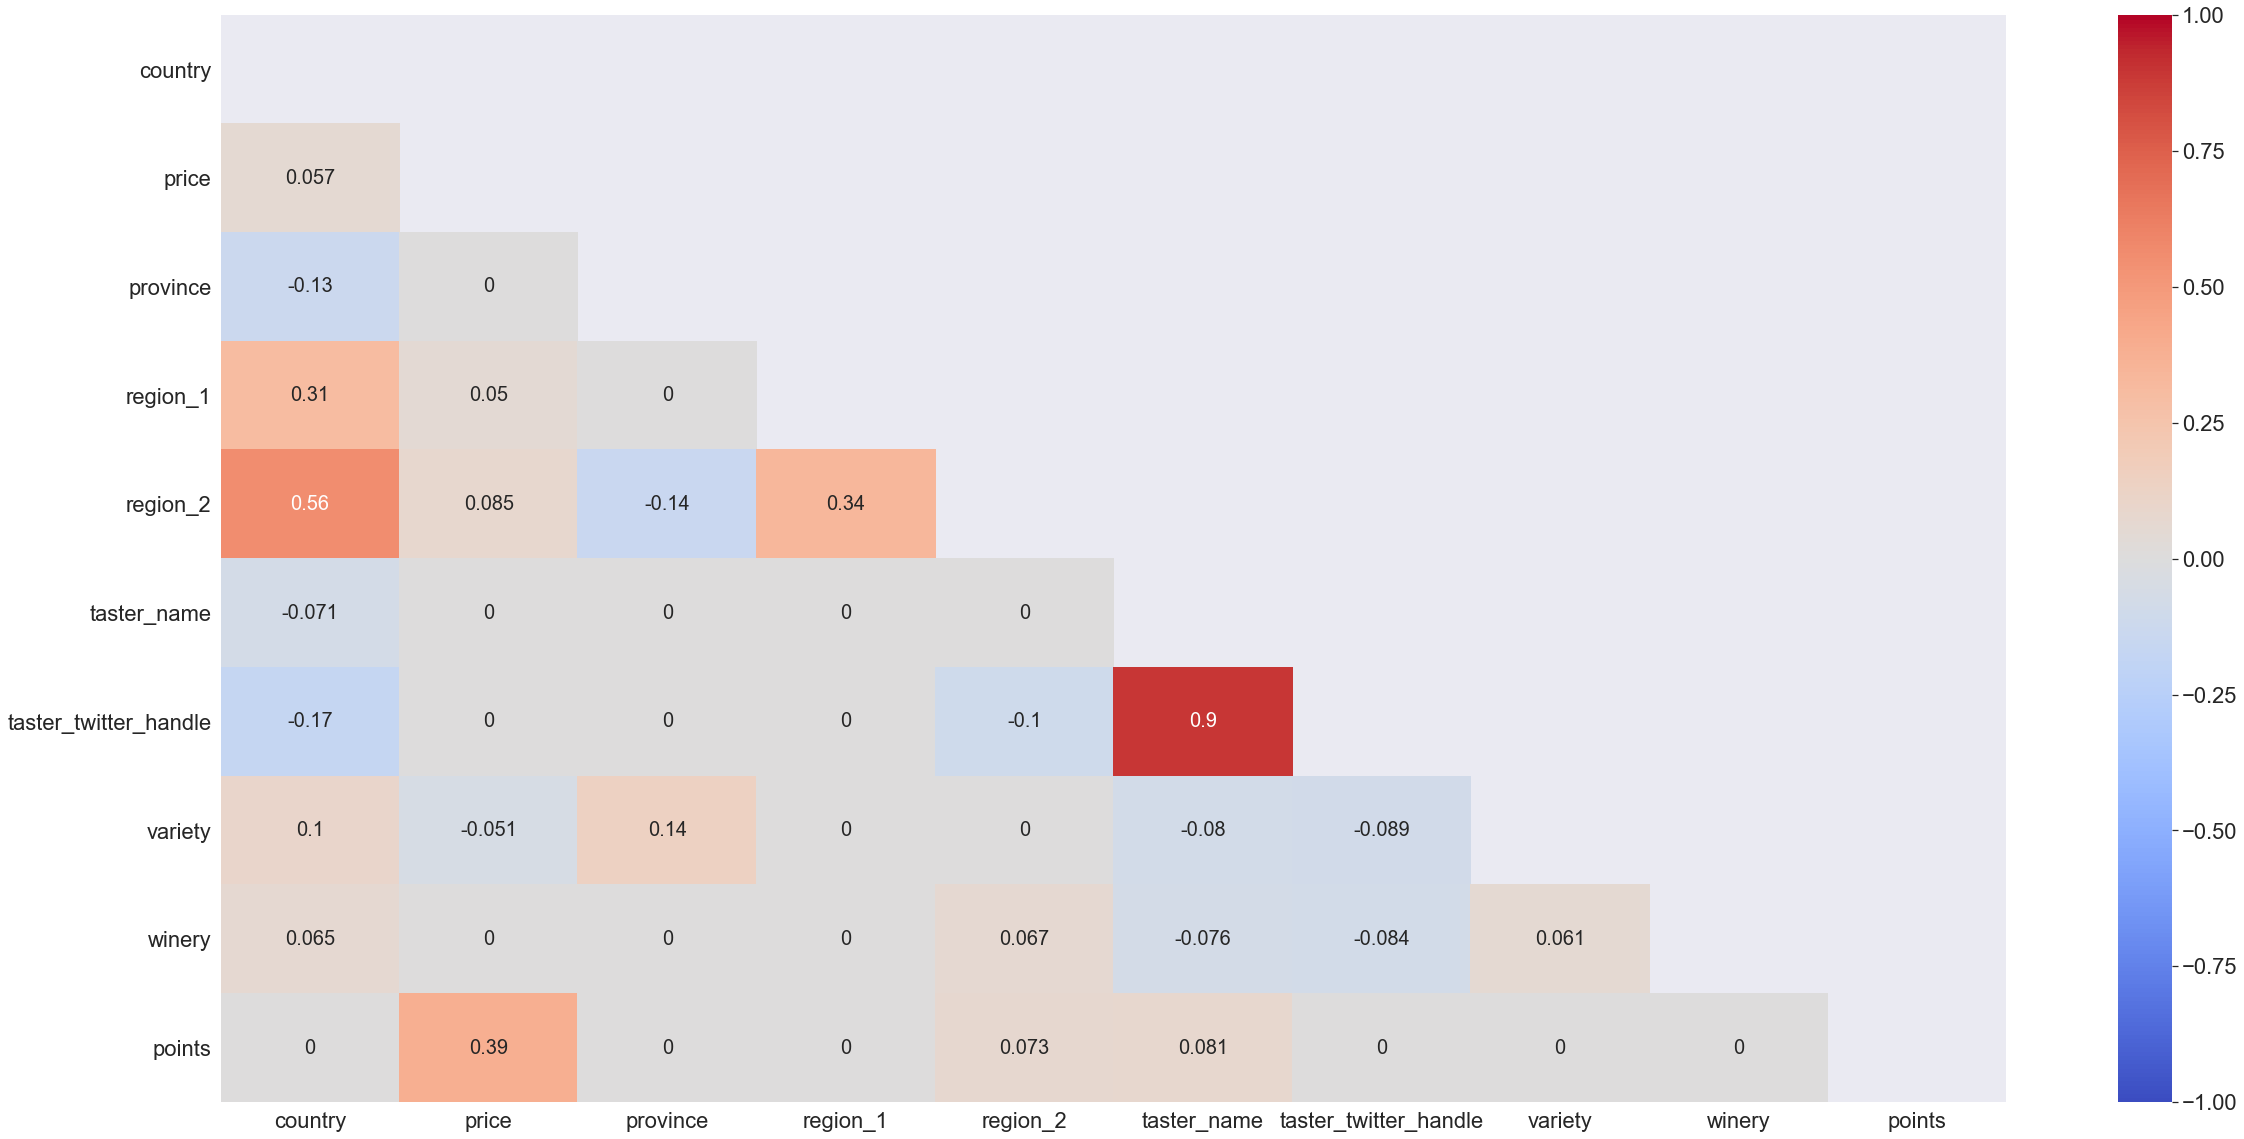

In [73]:
subjective_corr = parameter.corr()
subjective_corr[np.abs(subjective_corr)<.05] = 0
subjective_corr[np.abs(subjective_corr)<-.05] = 0
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(40,20))
heatmap = sns.heatmap(
                        subjective_corr,
                        annot=True, 
                        vmin = -1, 
                        cmap="coolwarm",
                        mask = mask,
                        annot_kws={"size":20}
                      )
sns.set(font_scale=2)

## 4. Modelling

#### 4.1 Set X and Y 

In [116]:
X = df[["price","region_2"]]

In [117]:
y = df[["points"]]

In [118]:
from sklearn.utils import shuffle
df = shuffle(df)

#### 4.2 Split Dataset intro train- and testdata

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### 4.3 Perform Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression() 
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
### predictions without hyperparameter optimization
predictions = regressor.predict(X_test)

## 5. Results

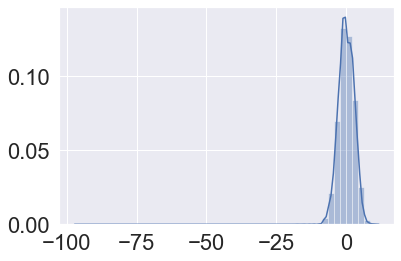

In [122]:
### view results 
sns.distplot(y_test-predictions)

In [123]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.2201636149272552
MSE: 7.8867707149097654
RMSE: 2.8083394942402826
